# 폴더에 있는 이미지 장르의 빈도수 세기

In [12]:
import os
from collections import Counter

# genre_mapping은 기존에 제공된 딕셔너리와 동일
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, "멜로드라마": 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, "실험": 1 << 7, "스릴러": 1 << 5, "서부": 1 << 4,
    "전쟁": 1 << 3, "갱스터": 1 << 2, "판타지": 1 << 1, "해양액션": 1 << 0
}

# 장르 빈도수를 저장하기 위한 Counter
genre_counter = Counter()

# 파일명이 저장된 폴더 경로
image_folder = r'G:\내 드라이브\project_poster\x_train - 복사본'

# 장르별 빈도수를 계산하는 함수
def count_genres_from_files(image_folder):
    # 폴더 내 파일을 순회하며
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            # 각 파일명에서 비트 플래그 추출
            movieNum = int(filename.split('_')[1].split('.')[0])
            
            # genre_mapping을 활용하여 장르 빈도수 카운트
            for genre, bitmask in genre_mapping.items():
                if movieNum & bitmask:
                    genre_counter[genre] += 1

# 장르 빈도수 세기 실행
count_genres_from_files(image_folder)
genre_counts = {}

# 결과 출력
# print("장르별 빈도수:")
for genre, count in sorted(genre_counter.items(),
                           key=lambda x:x[1],
                           reverse=True):
    # print(f"\"{genre}\": {count},")
    genre_counts[genre] = count

In [13]:
genre_counts

{'드라마': 4236,
 '코메디': 2467,
 '멜로/로맨스': 1199,
 '멜로드라마': 1199,
 '액션': 1025,
 '스릴러': 899,
 '판타지': 576,
 '가족': 534,
 '어드벤처': 506,
 '범죄': 480,
 '공포': 414,
 '미스터리': 410,
 'SF': 363,
 '에로': 226,
 '시대극/사극': 109,
 '아동': 94,
 '옴니버스': 94,
 '전쟁': 91,
 '뮤직': 84,
 '뮤지컬': 80,
 '스포츠': 70,
 '청춘영화': 52,
 '느와르': 48,
 '동성애': 34,
 '로드무비': 28,
 '전기': 25,
 '하이틴(고교)': 25,
 '사회물(경향)': 22,
 '무협': 19,
 '실험': 17,
 '재난': 15,
 '종교': 12,
 '서부': 8,
 '갱스터': 8,
 '반공/분단': 7,
 '첩보': 6,
 '활극': 5,
 '계몽': 3,
 '해양액션': 1,
 '군사': 1,
 '문예': 1,
 '신파': 1}

# 비슷한 장르끼리 묶기

In [14]:
resized_genre_mapping = {
    "드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
    "코메디": ["코메디"],
    '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
    "액션": ["액션", "재난", "범죄", "느와르",
           '활극','첩보','해양액션', "서부", "갱스터", '무협',
           "전쟁", "군사",'반공/분단'],
    "SF/판타지": ["SF", "판타지", "어드벤처"],
    "공포": ["공포", "스릴러", "미스터리"],
    "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
           "뮤직",'시대극/사극','전기', "아동",'로드무비']
}

list1=[]

for k, v in resized_genre_mapping.items():
    for i in v:
        # print(i)
        list1.append(i)
        
print(len(list1))

42


# 묶음 장르의 빈도수 세기

In [15]:
# 묶음 장르 빈도수 계산
final_counts = {}

# 각 묶음 장르에 대한 최종 빈도수 계산
for group, genres in resized_genre_mapping.items():
    total_count = sum(genre_counts.get(genre, 0) for genre in genres)  # 해당 장르의 빈도수를 합산
    final_counts[group] = total_count

# 최종 결과 출력
# print("묶음 장르 총합 빈도수:")
for group, count in sorted(final_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"\"{group}\": {count},")

"드라마": 4869,
"로맨스": 2658,
"코메디": 2467,
"공포": 1723,
"액션": 1714,
"SF/판타지": 1445,
"기타": 618,


# 묶음 장르의 빈도수 시각화

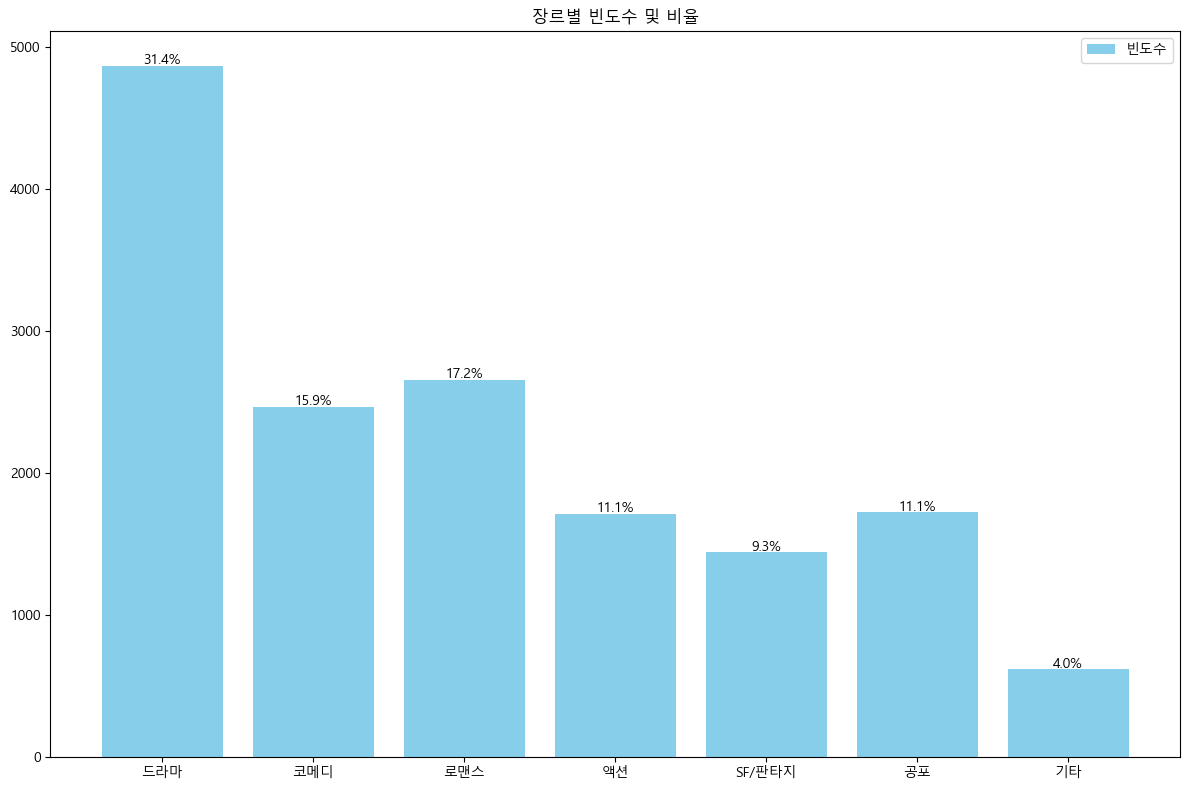

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres2 = list(final_counts.keys())
counts2 = list(final_counts.values())

# 빈도수 비율 계산
total_count = sum(counts2)
ratios2 = [(count / total_count) * 100 for count in counts2]  # 비율(%)

# 막대그래프 생성
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.bar(genres2, counts2, color='skyblue', label='빈도수')  # 세로 막대 그래프

# 빈도수 비율을 그래프에 추가
for i in range(len(genres2)):
    plt.text(i, counts2[i] + 10, f'{ratios2[i]:.1f}%', ha='center')  # 비율 표시

# 라벨 및 제목 설정
plt.title('장르별 빈도수 및 비율')
# plt.ylabel('빈도수')
# plt.xlabel('장르')
plt.tight_layout()  # 레이아웃 자동 조정
plt.legend()  # 범례 추가
plt.show()  # 그래프 출력
